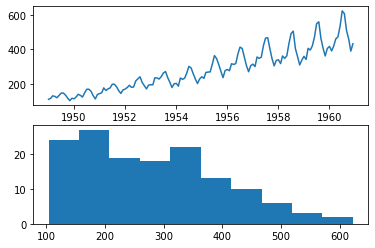

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox


df = pd.read_csv('data/AirPassengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
plt.figure(1)
plt.subplot(211)
plt.plot(df)
plt.subplot(212)
plt.hist(df)
plt.show()

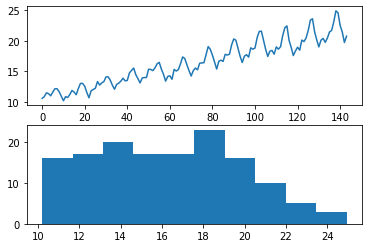

In [2]:
# square root transform

dataframe = pd.DataFrame(df.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = np.sqrt(dataframe['passengers'])
plt.figure(1)
plt.subplot(211)
plt.plot(dataframe['passengers'])
plt.subplot(212)
plt.hist(dataframe['passengers'])
plt.show()

- trend reduced but not removed

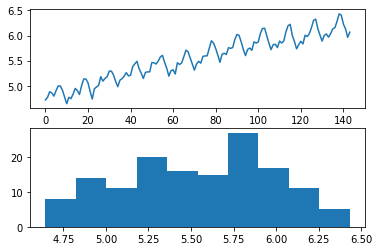

In [3]:
# log transofrm

dataframe = pd.DataFrame(df.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = np.log(dataframe['passengers'])
plt.figure(1)
plt.subplot(211)
plt.plot(dataframe['passengers'])
plt.subplot(212)
plt.hist(dataframe['passengers'])
plt.show()

- trend look more linear than square root transform
- histogram is more uniform/ squashed Gaussian-like distribution


- log is more popular transofrm - effective at removing exponential variance
- log() assumes values are positive and non-zero
- add fixed constant sometimes to make all values above zero
- transformed = np.log(x+constant)

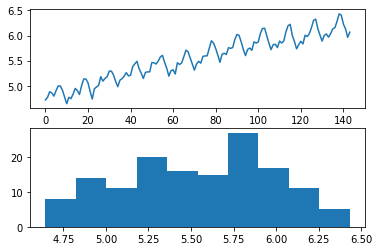

In [4]:
# Box-Cox transform
# lmbda = -1.0 -> reciprocal transofrm
# lmbda = -0.5 -> reciprocal square root transform
# lmbda = 0.0  -> log transform
# lmbda = 0.5  -> square root transform
# lmbda = 1.0  -> no transform


from scipy.stats import boxcox
dataframe = pd.DataFrame(df.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = boxcox(dataframe['passengers'], lmbda=0.0)
plt.figure(1)
plt.subplot(211)
plt.plot(dataframe['passengers'])
plt.subplot(212)
plt.hist(dataframe['passengers'])
plt.show()

estimated lambda: 0.148023


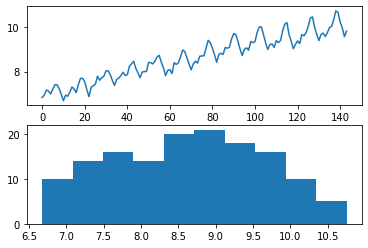

In [5]:
# automatic box-cox transform

dataframe = pd.DataFrame(df.values)
dataframe.columns = ['passengers']
dataframe['passengers'], lam = boxcox(dataframe['passengers'])
print('estimated lambda: %f' %lam)
plt.figure(1)
plt.subplot(211)
plt.plot(dataframe['passengers'])
plt.subplot(212)
plt.hist(dataframe['passengers'])
plt.show()